In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Figure 1

/tmp/ipykernel_1046475/1516428709.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_main = data_main.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_1046475/1516428709.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_ablate = data_ablate.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_1046475/1516428709.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_1046475/1516428709.py:116: FutureWarning: 

Setting a gradien

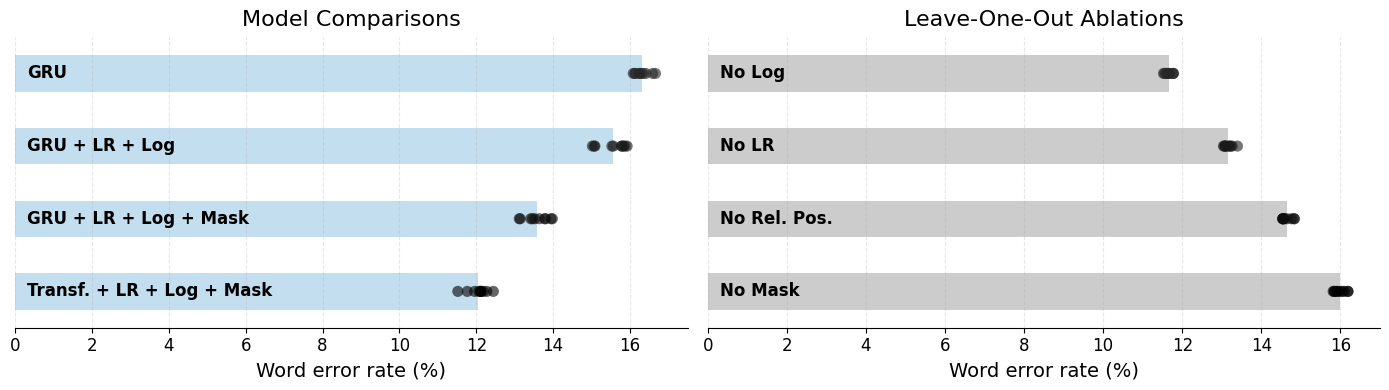

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)

# -----------------------------
# Data for main models
# -----------------------------
model_perf_dict_main = {
    "GRU": np.random.uniform(15.7, 16.7, size=10),
    "GRU + LR + Log": np.random.uniform(15, 16, size=10),
    "GRU + LR + Log + Mask": np.random.uniform(13, 14, size=10),
    "Transf. + LR + Log + Mask": np.random.uniform(11.5, 12.5, size=10),
}

model_order_main = list(model_perf_dict_main.keys())

data_main = pd.DataFrame([
    {"Model": m, "Performance": p} for m, ps in model_perf_dict_main.items() for p in ps
])
data_main["Model"] = pd.Categorical(data_main["Model"], categories=model_order_main, ordered=True)
means_main = data_main.groupby("Model")["Performance"].mean().reset_index()

# -----------------------------
# Data for ablations
# -----------------------------
model_perf_dict_ablate = {
    "No Log": np.random.uniform(11.5, 11.9, size=10),
    "No LR": np.random.uniform(13.0, 13.4, size=10),
    "No Rel. Pos.": np.random.uniform(14.5, 14.9, size=10),
    "No Mask": np.random.uniform(15.8, 16.2, size=10),
}
model_order_ablate = list(model_perf_dict_ablate.keys())

data_ablate = pd.DataFrame([
    {"Model": m, "Performance": p} for m, ps in model_perf_dict_ablate.items() for p in ps
])
data_ablate["Model"] = pd.Categorical(data_ablate["Model"], categories=model_order_ablate, ordered=True)
means_ablate = data_ablate.groupby("Model")["Performance"].mean().reset_index()

# -----------------------------
# Plotting
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=False, sharey=False)
bar_color = "#6baed6"

# ---- Main models plot ----
for _, row in means_main.iterrows():
    axes[0].barh(
        y=row["Model"],
        width=row["Performance"],
        color=bar_color,
        alpha=0.4,
        height=0.5,
        zorder=0,
    )
    axes[0].text(
        0.3,
        row["Model"],
        row["Model"],
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold',
        zorder=3,
    )

sns.stripplot(
    data=data_main,
    y="Model",
    x="Performance",
    order=model_order_main,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.6,
    legend=False,
    zorder=2,
    ax=axes[0],
)

axes[0].set_title("Model Comparisons", fontsize=16, pad=8)
axes[0].set_xlabel("Word error rate (%)", fontsize=14)
axes[0].set_ylabel("")
axes[0].tick_params(labelsize=12)
axes[0].set_xlim(left=0)
axes[0].grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True, ax=axes[0])

# ---- Ablation plot ----
for _, row in means_ablate.iterrows():
    axes[1].barh(
        y=row["Model"],
        width=row["Performance"],
        color='gray',
        alpha=0.4,
        height=0.5,
        zorder=0,
    )
    axes[1].text(
        0.3,
        row["Model"],
        row["Model"],
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold',
        zorder=3,
    )

sns.stripplot(
    data=data_ablate,
    y="Model",
    x="Performance",
    order=model_order_ablate,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.6,
    legend=False,
    zorder=2,
    ax=axes[1],
)

axes[1].set_title("Leave-One-Out Ablations", fontsize=16, pad=8)
axes[1].set_xlabel("Word error rate (%)", fontsize=14)
axes[1].set_ylabel("")
axes[1].tick_params(labelsize=12)
axes[1].set_xlim(left=0)
axes[0].set_yticks([])
axes[1].set_yticks([])
axes[1].grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True, ax=axes[1])
plt.savefig('figure_pdf/figure1/3_gram.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()


# Figure 2

In [83]:
def plot_model_perf_with_benchmark(data_dict, transf_orig_perf, gru_orig_perf, title, show_legend=True):
    # Reformat to long-form DataFrame
    data = []
    for model, values in data_dict.items():
        for val in values:
            data.append({'Model': model, 'Error Rate': val})
    df = pd.DataFrame(data)

    # Set colors
    palette = {
        'Transformer': '#4f81bd',  # lighter blue
        'GRU': '#b266b2'           # lighter purple
    }

    plt.figure(figsize=(4, 4))

    # Strip plot for individual seeds
    sns.stripplot(data=df, x='Model', y='Error Rate', jitter=True, dodge=False,
                  linewidth=1, edgecolor='none', color='black', size=6)

    # Bar plot for means
    ax = sns.barplot(data=df, x='Model', y='Error Rate', estimator='mean',
                     ci=None, palette=palette, width=0.5)

    # Dashed benchmark lines (black lines)
    bar_positions = [p.get_x() + p.get_width() / 2 for p in ax.patches]
    bar_width = ax.patches[0].get_width()

    ax.hlines(y=transf_orig_perf, xmin=bar_positions[0] - bar_width / 2,
              xmax=bar_positions[0] + bar_width / 2, color='black', linestyle='--')

    ax.hlines(y=gru_orig_perf, xmin=bar_positions[1] - bar_width / 2,
              xmax=bar_positions[1] + bar_width / 2, color='black', linestyle='--')

    # Custom legend
    if show_legend:
        legend_handles = [
            Patch(color=palette['Transformer'], label='Masked Transf.'),
            Patch(color=palette['GRU'], label='GRU')
        ]
        plt.legend(handles=legend_handles, fontsize=12)

    # Formatting
    plt.title(title, fontsize=12)
    plt.ylabel('Word Error Rate (%)', fontsize=12)
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_xlabel('')
    sns.despine()
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_1046475/2352220579.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Model', y='Error Rate', estimator='mean',
/tmp/ipykernel_1046475/2352220579.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Model', y='Error Rate', estimator='mean',


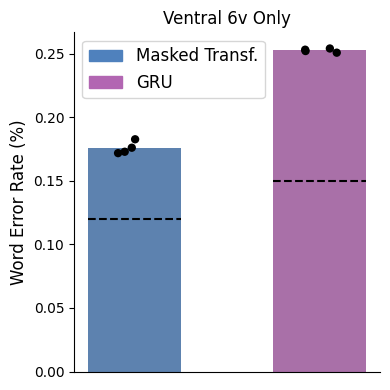

In [84]:
ventral_6v_perf = {
    'Transformer': [0.17193, 0.173, 0.17618, 0.18282],
    'GRU': [0.2543, 0.251, 0.2523, 0.25335]
}
plot_model_perf_with_benchmark(ventral_6v_perf, transf_orig_perf=0.12, gru_orig_perf=0.15, title='Ventral 6v Only')


/tmp/ipykernel_1046475/2352220579.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Model', y='Error Rate', estimator='mean',
/tmp/ipykernel_1046475/2352220579.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Model', y='Error Rate', estimator='mean',


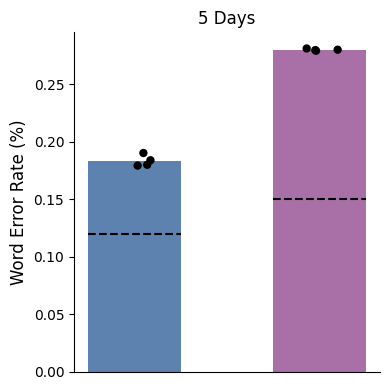

In [85]:
restricted_days = {
    'Transformer': [0.17929, 0.19023, 0.18, 0.18392],
    'GRU': [0.28016, 0.27927, 0.27981, 0.28123]
}
plot_model_perf_with_benchmark(restricted_days, transf_orig_perf=0.12, gru_orig_perf=0.15, title='5 Days', show_legend=False)

In [ ]:
restricted_days = {
    'Transformer': [0.17929, 0.19023, 0.18, 0.18392],
    'GRU': [0.28016, 0.27927, 0.27981, 0.28123]
}
plot_model_perf_with_benchmark(restricted_days, transf_orig_perf=0.12, gru_orig_perf=0.15, title='5 Days', show_legend=False)

# Figure 2

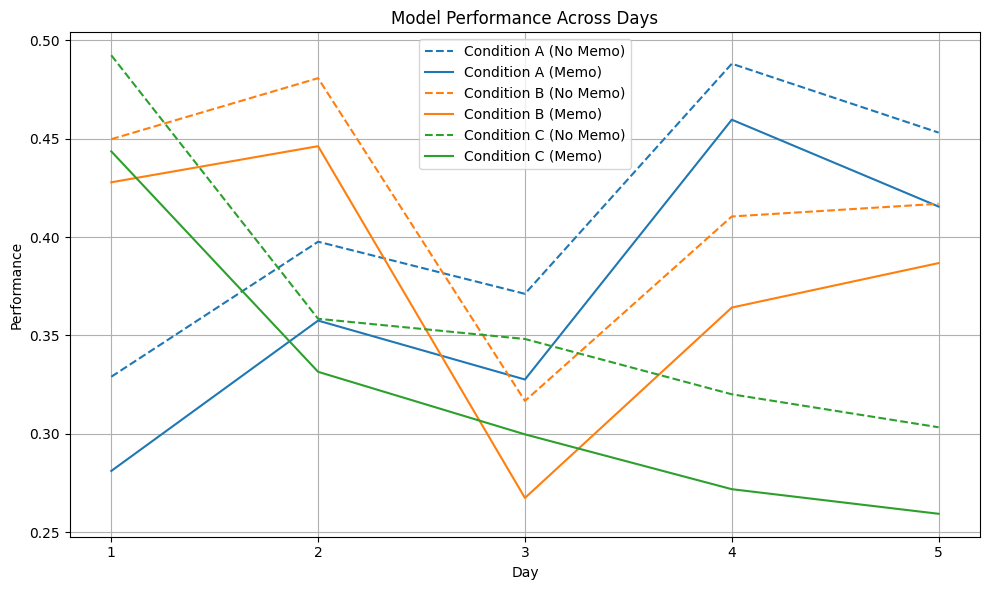

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
days = np.arange(1, 6)  # Days 1 to 5
conditions = ['Condition A', 'Condition B', 'Condition C']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Fake data: shape (n_conditions, n_days)
performance_no_memo = np.random.uniform(0.3, 0.5, size=(3, 5))
performance_memo = performance_no_memo - np.random.uniform(0.02, 0.05, size=(3, 5))  # Memo does better

plt.figure(figsize=(10, 6))

for i, (cond, color) in enumerate(zip(conditions, colors)):
    plt.plot(days, performance_no_memo[i], linestyle='--', color=color, label=f'{cond} (No Memo)')
    plt.plot(days, performance_memo[i], linestyle='-', color=color, label=f'{cond} (Memo)')

plt.xlabel('Day')
plt.ylabel('Performance')
plt.title('Model Performance Across Days')
plt.xticks(days)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
